<h1 align=center><font size = 5><h1 align=center><font size = 5>Capstone Project - The Neighborhoods of Paris - Restaurants</font></h1></font></h1>

# Introduction/Business Problem section

## 1.1 Description of the problem 

Paris is the capital and the most popular city in France. I enjoyed my winter break two years ago in paris where the delicious food there is very impressive! For someone who would like to start the new business in paris, what can we provide the support information and where can we recommend that they open it ?

## 1.2 Discussion of the Background 

Paris is currently ranked 3rd in the global economic power index. The City of Paris is the centre and seat of government of the Paris Region, which has an estimated official 2020 population of 12,278,210, or about 18 percent of the population of France. 

Paris has been famous for its restaurants. Also, Paris received 38 million visitors in 2019, measured by hotel stays, with the largest numbers of foreign visitors coming from the United States, the United Kingdom, Germany, and China. It was ranked as the second most visited travel destination in the world in 2019, after Bangkok and just ahead of London. These might provide great opportunities for restaurant to offer decilious food for travellers and workers. 

The city of Paris is divided into 20 arrondissements such as Louvre, Bourse, Temple, Hôtel-de-Ville, Panthéon etc. It is difficult to figure out where will be the great place to open the restaurant. In this project, I will outline the data preparation and then use Foursquare location data and clustering methods to group the Arriondissements to different group by their restaurant venues information. 

## 1.3 Target the Audience 

What kind of people will be interested in the project ?

1. Businees people who would like to invest or open a restaurant 
2. Workers or students who prefer to find the close restaurants enjoy the lunch/dinner time. 
3. Data Scientists who want to implement different analysis based on the datasets and information provided.

# Data section 

## 2.1 Web Scrapping from Wikipedia

Scrapping the following Wikipedia page, https://en.wikipedia.org/wiki/Arrondissements_of_Paris. I’ve used requests and Beautifulsoup4 library to create a data-frame containing name of the 20 Arrondissements, Name, Area, Population, Density, Peak of Population, Mayor. We start as below and simply the dataframe to only focus on the Arrondissements, Name, Area and Population. 

In [4]:
from bs4 import BeautifulSoup 
import requests # library to handle requests

import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

! pip install folium==0.5.0
import folium

url = "https://en.wikipedia.org/wiki/Arrondissements_of_Paris"
html_content = requests.get(url).text
soup = BeautifulSoup(html_content, "lxml")

# find the table 

My_table = soup.find('table', class_='wikitable')
table_A = []
for tr in My_table.findAll('tr'):
    td = tr.find_all('td')
    if len(td)==7:
        row = [i.text for i in td]
        table_A.append(row)

# define the dataframe columns
column_names = ['Arrondissements', 'Name', 'Area','Population','Density','Peak of Population','Mayor']

# instantiate the dataframe
df = pd.DataFrame(table_A, columns=column_names)

# simplify the data
df_new=df.drop(['Density','Peak of Population','Mayor'], axis=1)


#restore the data for length!=7 into a new dataframe
dict = {'Arrondissements':['2nd (IIe) RAdministratively part of Paris Centre', '3rd (IIIe) RAdministratively part of Paris Centre', '4th (IVe) RAdministratively part of Paris Centre'], 
        'Name':['Bourse', 'Temple', 'Hôtel-de-Ville'], 
        'Area':['5.59 km2 (2.16 sq mi)','5.59 km2 (2.16 sq mi)','5.59 km2 (2.16 sq mi)'],
        'Population':['100,196','100,196','100,196'],
       } 
df2 = pd.DataFrame(dict)

# insert the dataframe between the 1st line and the 2nd line, becoming the new dataframe
df3=pd.concat([df_new.iloc[:1],df2, df_new.iloc[1:]]).reset_index(drop = True)
df3

     |████████████████████████████████| 79 kB 9.4 MB/s  eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=7494c6e7dacad20b01a7e1dada724aed1802483cdd7dde1c8d7018b6e70d6ee7
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium


,Arrondissements,Name,Area,Population
0,1st(Ier) RAdministratively part of Paris Centre,Louvre,5.59 km2 (2.16 sq mi),"100,196"
1,2nd (IIe) RAdministratively part of Paris Centre,Bourse,5.59 km2 (2.16 sq mi),"100,196"
2,3rd (IIIe) RAdministratively part of Paris Centre,Temple,5.59 km2 (2.16 sq mi),"100,196"
3,4th (IVe) RAdministratively part of Paris Centre,Hôtel-de-Ville,5.59 km2 (2.16 sq mi),"100,196"
4,5th (Ve) L,Panthéon,2.541 km2 (0.981 sq mi),"59,631"
5,6th (VIe) L,Luxembourg,2.154 km2 (0.832 sq mi),"41,976"
6,7th (VIIe) L,Palais-Bourbon,4.088 km2 (1.578 sq mi),"52,193"
7,8th (VIIIe) R,Élysée,3.881 km2 (1.498 sq mi),"37,368"
8,9th (IXe) R,Opéra,2.179 km2 (0.841 sq mi),"60,071"
9,10th (Xe) R,Entrepôt,2.892 km2 (1.117 sq mi),"90,836"


## 2.2 Get the coordinates of the Arrondissements

Obtain coordinates using Geopy library

In [5]:
geolocator = Nominatim(user_agent='myGeocoder')
df3['Coor'] = df3['Name'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df3[['Latitude','Longitude']] = df3['Coor'].apply(pd.Series)
df3.drop(['Coor'], axis=1, inplace=True)
df3

,Arrondissements,Name,Area,Population,Latitude,Longitude
0,1st(Ier) RAdministratively part of Paris Centre,Louvre,5.59 km2 (2.16 sq mi),"100,196",48.861147,2.338028
1,2nd (IIe) RAdministratively part of Paris Centre,Bourse,5.59 km2 (2.16 sq mi),"100,196",48.868630,2.341474
2,3rd (IIIe) RAdministratively part of Paris Centre,Temple,5.59 km2 (2.16 sq mi),"100,196",31.098207,-97.342785
3,4th (IVe) RAdministratively part of Paris Centre,Hôtel-de-Ville,5.59 km2 (2.16 sq mi),"100,196",43.949283,4.805260
4,5th (Ve) L,Panthéon,2.541 km2 (0.981 sq mi),"59,631",41.898616,12.476833
5,6th (VIe) L,Luxembourg,2.154 km2 (0.832 sq mi),"41,976",49.815868,6.129675
6,7th (VIIe) L,Palais-Bourbon,4.088 km2 (1.578 sq mi),"52,193",48.861596,2.317909
7,8th (VIIIe) R,Élysée,3.881 km2 (1.498 sq mi),"37,368",4.753042,-54.044953
8,9th (IXe) R,Opéra,2.179 km2 (0.841 sq mi),"60,071",48.876019,2.339962
9,10th (Xe) R,Entrepôt,2.892 km2 (1.117 sq mi),"90,836",48.876126,2.359839


It seems the coordinate the Arrondissements' returns wrong since the Name of the Arrondissement in the data frame might be diffrent from the actual one. We double checked the geographical coordinate of paris.  

In [8]:
address = 'Paris'

geolocator = Nominatim(user_agent="paris_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8566969, 2.3514616.


Since the geograpical coordinate of Paris are 48.8611473, 2.33802768704666. Latitude and Longtitude seems wrong for those Arrondissements far away from 48.8566969, 2.3514616.

In [9]:
# create the column of new name by adding prefix Paris and find the corresponding latitude and longitude by the new name to get the correct coordinates
geolocator = Nominatim(user_agent='myGeocoder')
df3['New Name'] = 'Paris ' + df3['Name'].astype(str)
df3['Coor'] = df3['New Name'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df3[['Latitude','Longitude']] = df3['Coor'].apply(pd.Series)

# drop the Coor and New Name to make the dataframe clean
df3.drop(['Coor'], axis=1, inplace=True)
df3.drop(['New Name'], axis=1, inplace=True)
df3

,Arrondissements,Name,Area,Population,Latitude,Longitude
0,1st(Ier) RAdministratively part of Paris Centre,Louvre,5.59 km2 (2.16 sq mi),"100,196",48.864718,2.343805
1,2nd (IIe) RAdministratively part of Paris Centre,Bourse,5.59 km2 (2.16 sq mi),"100,196",48.869756,2.341488
2,3rd (IIIe) RAdministratively part of Paris Centre,Temple,5.59 km2 (2.16 sq mi),"100,196",48.865613,2.360905
3,4th (IVe) RAdministratively part of Paris Centre,Hôtel-de-Ville,5.59 km2 (2.16 sq mi),"100,196",48.856821,2.352301
4,5th (Ve) L,Panthéon,2.541 km2 (0.981 sq mi),"59,631",48.846191,2.346079
5,6th (VIe) L,Luxembourg,2.154 km2 (0.832 sq mi),"41,976",48.850433,2.332951
6,7th (VIIe) L,Palais-Bourbon,4.088 km2 (1.578 sq mi),"52,193",48.860920,2.318035
7,8th (VIIIe) R,Élysée,3.881 km2 (1.498 sq mi),"37,368",48.846644,2.369830
8,9th (IXe) R,Opéra,2.179 km2 (0.841 sq mi),"60,071",48.872138,2.330630
9,10th (Xe) R,Entrepôt,2.892 km2 (1.117 sq mi),"90,836",48.876126,2.359839


## 2.3 create the map of Paris of 20 Arrondissements showed below:

I used python folium library to visualize geographic details of Paris and its 20 Arrondissements based on Latitude and Longtitude

In [10]:
# create map of Paris using latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df3['Latitude'], df3['Longitude'], df3['Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_paris)  
    
map_paris

## 2.4 Using FourSquare Location Data

Utilizing the Foursquare API to explore the Arrondissements and segment them.

#### Define Foursquare Credentials and Version

In [11]:
CLIENT_ID = '4DBS44JI1BC3QVNDIE1UZPFDFE2OSZJZKJOUJKQUGQKNPQ5M' # your Foursquare ID
CLIENT_SECRET = 'XCF4J5WZ0TFL0OYP1C2RIWLHE4YAPK1WFGAKSPQR01UBGZNO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

Now, let's get the venues that are in each 20 Arriondissements within a radius of 500 meters.

In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Check the size of dataframe and its related venues 

In [13]:
paris_venues = getNearbyVenues(names=df3['Name'],
                                   latitudes=df3['Latitude'],
                                   longitudes=df3['Longitude']
                                  )
print(paris_venues.shape)
paris_venues

Louvre
Bourse
Temple
Hôtel-de-Ville
Panthéon
Luxembourg
Palais-Bourbon
Élysée
Opéra
Entrepôt
Popincourt
Reuilly
Gobelins
Observatoire
Vaugirard
Passy
Batignolles-Monceau
Butte-Montmartre
Buttes-Chaumont
Ménilmontant
(1357, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Louvre,48.864718,2.343805,Le Louis,48.864331,2.341332,French Restaurant
1,Louvre,48.864718,2.343805,Filakia,48.865646,2.345619,Souvlaki Shop
2,Louvre,48.864718,2.343805,Le Comptoir de la Gastronomie,48.864555,2.345259,French Restaurant
3,Louvre,48.864718,2.343805,Place des Victoires,48.865759,2.341219,Plaza
4,Louvre,48.864718,2.343805,Spa Nuxe,48.864017,2.346650,Spa
...,...,...,...,...,...,...,...
1352,Ménilmontant,48.867716,2.383701,Bøti,48.864144,2.386524,Restaurant
1353,Ménilmontant,48.867716,2.383701,La Mercerie,48.865746,2.378127,Bar
1354,Ménilmontant,48.867716,2.383701,Triplettes,48.870492,2.378754,Bar
1355,Ménilmontant,48.867716,2.383701,Hôtel Les Chansonniers,48.865452,2.384100,Hotel


# Methodology section

## 3.1 Folium Library and Map of the restaurants in paris 

Folium is a python library that can create interactive map using coordinate data. Creating the new data frame with Venue Category contains Restaurant only

In [15]:
paris_venues_only_restaurant = paris_venues[paris_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
paris_venues_only_restaurant.index = np.arange(1, len(paris_venues_only_restaurant)+1)
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", paris_venues_only_restaurant.shape)
paris_venues_only_restaurant

Shape of the Data-Frame with Venue Category only Restaurant:  (462, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Louvre,48.864718,2.343805,Le Louis,48.864331,2.341332,French Restaurant
2,Louvre,48.864718,2.343805,Le Comptoir de la Gastronomie,48.864555,2.345259,French Restaurant
3,Louvre,48.864718,2.343805,Les Fines Gueules,48.865172,2.340645,French Restaurant
4,Louvre,48.864718,2.343805,Le Pot de Vins,48.864322,2.340193,Restaurant
5,Louvre,48.864718,2.343805,La Cevicheria,48.866192,2.345474,Peruvian Restaurant
...,...,...,...,...,...,...,...
458,Ménilmontant,48.867716,2.383701,Le Vieux Belleville,48.871660,2.386255,French Restaurant
459,Ménilmontant,48.867716,2.383701,Sürpriz,48.865841,2.378772,Kebab Restaurant
460,Ménilmontant,48.867716,2.383701,Chez Ramona,48.871197,2.379765,Spanish Restaurant
461,Ménilmontant,48.867716,2.383701,Greenhouse,48.865114,2.382354,Vegetarian / Vegan Restaurant


Check the paris venues distribution for all kinds of restaurants in paris and show the top 10 in the venue category 

In [16]:
print('There are {} uniques categories.'.format(len(paris_venues_only_restaurant['Venue Category'].unique())))
paris_venues_only_restaurant['Venue Category'].value_counts().head(10)

There are 55 uniques categories.


French Restaurant        173
Italian Restaurant        56
Japanese Restaurant       30
Restaurant                20
Vietnamese Restaurant     16
Thai Restaurant           14
Indian Restaurant         12
Seafood Restaurant        10
Lebanese Restaurant       10
Chinese Restaurant        10
Name: Venue Category, dtype: int64

In [17]:
# create map of Paris using latitude and longitude values
map_paris_restaurant = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(paris_venues_only_restaurant['Venue Latitude'], paris_venues_only_restaurant['Venue Longitude'], 
                           paris_venues_only_restaurant['Venue Category']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_paris_restaurant)  
    
map_paris_restaurant

## 3.2 Explore data analysis

Exploring the top 10 venues categories for all the paris venues 

In [18]:
# create a dataframe of top 10 categories
Paris_Venues_Top10 = paris_venues['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Paris_Venues_Top10=Paris_Venues_Top10.reset_index()
#Tokyo_5_Dist_Venues_Top10

Paris_Venues_Top10.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)
Paris_Venues_Top10

,Venue Category,Frequency
0,French Restaurant,173
1,Hotel,77
2,Bar,63
3,Italian Restaurant,56
4,Bakery,41
5,Coffee Shop,30
6,Japanese Restaurant,30
7,Plaza,29
8,Café,29
9,Bistro,28


There are totally 203 uniques categoreies where "French Restaurants" top the charts as we can see in the plot below:

There are 203 uniques categories.


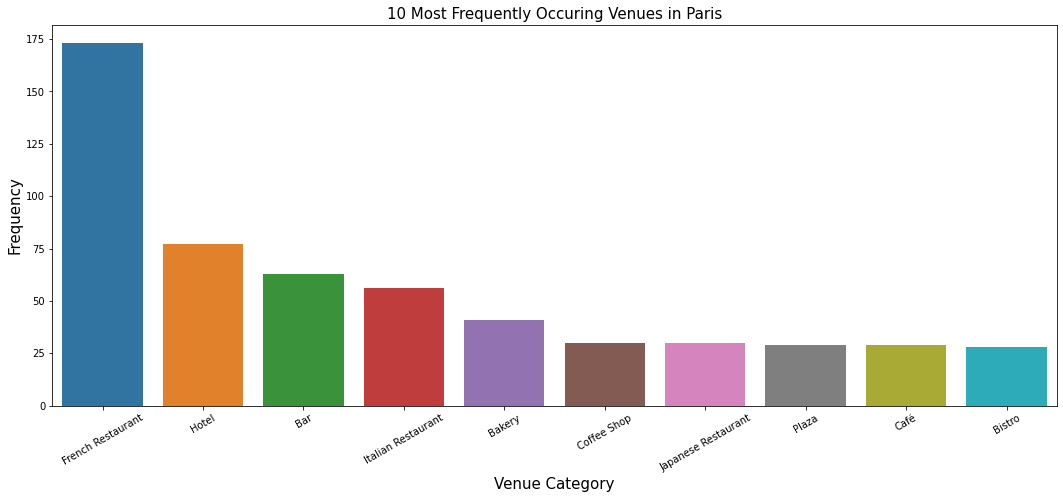

In [19]:
print('There are {} uniques categories.'.format(len(paris_venues['Venue Category'].unique())))
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue Category", y="Frequency", data=Paris_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues in Paris', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

There are lots of iconic food in french restaurants, which can truly prove that why Paris has been famous for its restaurants.
Let's explore the data a bit more by creating a data frame with pandas one hot encoding for the venues categories, and then use pandas groupby on the neighborhood column and obtain the mean of the one-hot encoded venue categories.

In [20]:
# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot.head()

,Neighborhood,African Restaurant,Alsatian Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Louvre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Louvre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Louvre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Louvre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Louvre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()
paris_grouped

,Neighborhood,African Restaurant,Alsatian Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Batignolles-Monceau,0.000000,0.00,0.000000,0.000000,0.000000,0.022222,0.022222,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022222
1,Bourse,0.000000,0.00,0.000000,0.011236,0.011236,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.056180,0.011236,0.011236,0.000000
2,Butte-Montmartre,0.000000,0.00,0.000000,0.000000,0.014706,0.014706,0.000000,0.000000,0.014706,...,0.00,0.000000,0.000000,0.014706,0.000000,0.000000,0.014706,0.000000,0.000000,0.000000
3,Buttes-Chaumont,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Entrepôt,0.020000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,...,0.00,0.000000,0.000000,0.010000,0.000000,0.000000,0.010000,0.020000,0.000000,0.000000
5,Gobelins,0.000000,0.00,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.060000,0.000000,0.000000,0.000000,0.000000
6,Hôtel-de-Ville,0.000000,0.01,0.000000,0.000000,0.000000,0.030000,0.010000,0.010000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,0.000000,0.000000
7,Louvre,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,...,0.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.010000,0.010000,0.000000
8,Luxembourg,0.000000,0.00,0.034483,0.000000,0.000000,0.017241,0.017241,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.051724,0.000000,0.000000,0.000000
9,Ménilmontant,0.020408,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.020408,0.000000,0.020408,0.000000,0.000000,0.000000,0.000000


Output the top 5 venues for each Neighborhood in Paris

In [22]:
num_top_venues = 5

for hood in paris_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Batignolles-Monceau----
               venue  freq
0  French Restaurant  0.20
1              Hotel  0.07
2                Bar  0.04
3       Burger Joint  0.04
4     Sandwich Place  0.04


----Bourse----
               venue  freq
0  French Restaurant  0.09
1           Wine Bar  0.06
2              Hotel  0.06
3       Cocktail Bar  0.06
4   Pedestrian Plaza  0.04


----Butte-Montmartre----
                venue  freq
0   French Restaurant  0.16
1                 Bar  0.16
2  Italian Restaurant  0.04
3              Bistro  0.04
4                Café  0.04


----Buttes-Chaumont----
                 venue  freq
0    French Restaurant  0.17
1  Japanese Restaurant  0.08
2                Plaza  0.08
3          Supermarket  0.08
4          Pizza Place  0.08


----Entrepôt----
               venue  freq
0  French Restaurant  0.11
1              Hotel  0.07
2             Bistro  0.05
3        Coffee Shop  0.04
4               Café  0.04


----Gobelins----
                   venue  freq
0    

In [23]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Afterwards, you are able to see the sorted venues categories for each neighborhood. 

In [24]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Batignolles-Monceau,French Restaurant,Hotel,Bar,Sandwich Place,Burger Joint,Yoga Studio,Salon / Barbershop,Salad Place,Cocktail Bar,Pool
1,Bourse,French Restaurant,Cocktail Bar,Wine Bar,Hotel,Pedestrian Plaza,Japanese Restaurant,Creperie,Bookstore,Bistro,Italian Restaurant
2,Butte-Montmartre,Bar,French Restaurant,Café,Bistro,Italian Restaurant,Middle Eastern Restaurant,Japanese Restaurant,Sandwich Place,Pizza Place,Convenience Store
3,Buttes-Chaumont,French Restaurant,Japanese Restaurant,Supermarket,Pizza Place,Plaza,Pool,Bus Stop,Steakhouse,Sandwich Place,Grocery Store
4,Entrepôt,French Restaurant,Hotel,Bistro,Café,Coffee Shop,Restaurant,Pizza Place,Bar,Indian Restaurant,Cocktail Bar


Plotting the below graph, we can see Entrepôt and Reuill comes on top with 41 restaurants.

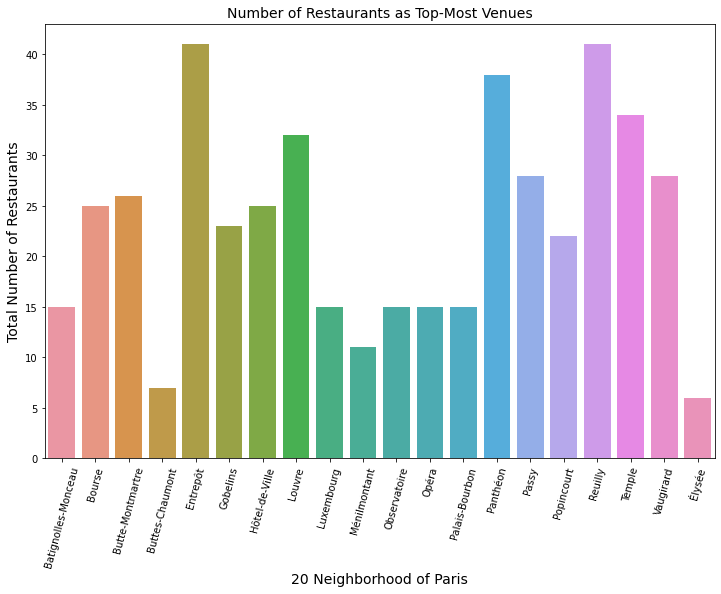

           Neighborhood  Number of Restaurant
1   Batignolles-Monceau                    15
2                Bourse                    25
3      Butte-Montmartre                    26
4       Buttes-Chaumont                     7
5              Entrepôt                    41
6              Gobelins                    23
7        Hôtel-de-Ville                    25
8                Louvre                    32
9            Luxembourg                    15
10         Ménilmontant                    11
11         Observatoire                    15
12                Opéra                    15
13       Palais-Bourbon                    15
14             Panthéon                    38
15                Passy                    28
16           Popincourt                    22
17              Reuilly                    41
18               Temple                    34
19            Vaugirard                    28
20               Élysée                     6


In [25]:
#try groupby to play with restaurant 
paris_Venues_restaurant = paris_venues.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
paris_Venues_restaurant_df = paris_Venues_restaurant.to_frame().reset_index()
paris_Venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
paris_Venues_restaurant_df.index = np.arange(1, len(paris_Venues_restaurant_df)+1)

list_rest_no = paris_Venues_restaurant_df['Number of Restaurant'].to_list()

fig = plt.figure(figsize=(12,8))
bar = sns.barplot(x='Neighborhood', y='Number of Restaurant', data=paris_Venues_restaurant_df)

bar.set_ylabel("Total Number of Restaurants", fontsize=14)
bar.set_xlabel("20 Neighborhood of Paris", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=75)
bar.set_title("Number of Restaurants as Top-Most Venues", fontsize=14)
plt.show()
print(paris_Venues_restaurant_df)

## 4.1 Clustering Neighborhoods in Paris

Run _k_-means to cluster the neighborhood into 5 clusters.

In [26]:
# set number of clusters
kclusters = 5

paris_grouped_clustering = paris_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 0, 2, 3, 2, 2, 0, 0, 0, 1], dtype=int32)

In [27]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

paris_merged = df3

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
paris_merged = paris_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Name')

paris_merged # check the last columns!

,Arrondissements,Name,Area,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1st(Ier) RAdministratively part of Paris Centre,Louvre,5.59 km2 (2.16 sq mi),"100,196",48.864718,2.343805,0,French Restaurant,Bakery,Cocktail Bar,Wine Bar,Italian Restaurant,Tea Room,Sandwich Place,Cheese Shop,Chinese Restaurant,Pedestrian Plaza
1,2nd (IIe) RAdministratively part of Paris Centre,Bourse,5.59 km2 (2.16 sq mi),"100,196",48.869756,2.341488,0,French Restaurant,Cocktail Bar,Wine Bar,Hotel,Pedestrian Plaza,Japanese Restaurant,Creperie,Bookstore,Bistro,Italian Restaurant
2,3rd (IIIe) RAdministratively part of Paris Centre,Temple,5.59 km2 (2.16 sq mi),"100,196",48.865613,2.360905,0,French Restaurant,Wine Bar,Hotel,Vietnamese Restaurant,Art Gallery,Italian Restaurant,Sandwich Place,Bakery,Restaurant,Japanese Restaurant
3,4th (IVe) RAdministratively part of Paris Centre,Hôtel-de-Ville,5.59 km2 (2.16 sq mi),"100,196",48.856821,2.352301,0,French Restaurant,Ice Cream Shop,Plaza,Coffee Shop,Hotel,Historic Site,Park,Italian Restaurant,Art Gallery,Wine Bar
4,5th (Ve) L,Panthéon,2.541 km2 (0.981 sq mi),"59,631",48.846191,2.346079,2,French Restaurant,Hotel,Bar,Bakery,Italian Restaurant,Café,Pub,Indie Movie Theater,Creperie,Ice Cream Shop
5,6th (VIe) L,Luxembourg,2.154 km2 (0.832 sq mi),"41,976",48.850433,2.332951,0,Plaza,Italian Restaurant,French Restaurant,Wine Bar,Fountain,American Restaurant,Chocolate Shop,Café,Bakery,Breton Restaurant
6,7th (VIIe) L,Palais-Bourbon,4.088 km2 (1.578 sq mi),"52,193",48.860920,2.318035,2,French Restaurant,Hotel,Café,Plaza,Italian Restaurant,Pedestrian Plaza,Coffee Shop,Park,Beer Garden,Food Truck
7,8th (VIIIe) R,Élysée,3.881 km2 (1.498 sq mi),"37,368",48.846644,2.369830,2,Hotel,Sandwich Place,French Restaurant,Coffee Shop,Train Station,Harbor / Marina,Bakery,Hotel Bar,Pharmacy,Trail
8,9th (IXe) R,Opéra,2.179 km2 (0.841 sq mi),"60,071",48.872138,2.330630,0,Hotel,Clothing Store,French Restaurant,Department Store,Italian Restaurant,Plaza,Gourmet Shop,Men's Store,Coffee Shop,Theater
9,10th (Xe) R,Entrepôt,2.892 km2 (1.117 sq mi),"90,836",48.876126,2.359839,2,French Restaurant,Hotel,Bistro,Café,Coffee Shop,Restaurant,Pizza Place,Bar,Indian Restaurant,Cocktail Bar


#### We can represent these 5 clusters in a leaflet map using Folium library as below —

In [28]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
Arrondissements = paris_Venues_restaurant_df['Neighborhood'].values.tolist()


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(paris_merged['Latitude'], paris_merged['Longitude'], paris_merged['Name'], paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[Arrondissements.index(poi)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### From the map above, each cluster belongs to a color with different characteristics. Also, the size of the circles represents number of restaurants as most common venues for each Arriondissement

#### Cluster 1 (Red)

In [29]:
paris_merged.loc[paris_merged['Cluster Labels'] == 0, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Name,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Louvre,2.343805,0,French Restaurant,Bakery,Cocktail Bar,Wine Bar,Italian Restaurant,Tea Room,Sandwich Place,Cheese Shop,Chinese Restaurant,Pedestrian Plaza
1,Bourse,2.341488,0,French Restaurant,Cocktail Bar,Wine Bar,Hotel,Pedestrian Plaza,Japanese Restaurant,Creperie,Bookstore,Bistro,Italian Restaurant
2,Temple,2.360905,0,French Restaurant,Wine Bar,Hotel,Vietnamese Restaurant,Art Gallery,Italian Restaurant,Sandwich Place,Bakery,Restaurant,Japanese Restaurant
3,Hôtel-de-Ville,2.352301,0,French Restaurant,Ice Cream Shop,Plaza,Coffee Shop,Hotel,Historic Site,Park,Italian Restaurant,Art Gallery,Wine Bar
5,Luxembourg,2.332951,0,Plaza,Italian Restaurant,French Restaurant,Wine Bar,Fountain,American Restaurant,Chocolate Shop,Café,Bakery,Breton Restaurant
8,Opéra,2.330630,0,Hotel,Clothing Store,French Restaurant,Department Store,Italian Restaurant,Plaza,Gourmet Shop,Men's Store,Coffee Shop,Theater


#### Cluster 2 (Purple)

In [30]:
paris_merged.loc[paris_merged['Cluster Labels'] == 1, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Name,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Ménilmontant,2.383701,1,Bar,Pizza Place,Italian Restaurant,Burger Joint,Café,French Restaurant,Cocktail Bar,African Restaurant,Brewery,Rock Club


#### Cluster 3 (Blue)

In [31]:
paris_merged.loc[paris_merged['Cluster Labels'] == 2, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Name,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Panthéon,2.346079,2,French Restaurant,Hotel,Bar,Bakery,Italian Restaurant,Café,Pub,Indie Movie Theater,Creperie,Ice Cream Shop
6,Palais-Bourbon,2.318035,2,French Restaurant,Hotel,Café,Plaza,Italian Restaurant,Pedestrian Plaza,Coffee Shop,Park,Beer Garden,Food Truck
7,Élysée,2.369830,2,Hotel,Sandwich Place,French Restaurant,Coffee Shop,Train Station,Harbor / Marina,Bakery,Hotel Bar,Pharmacy,Trail
9,Entrepôt,2.359839,2,French Restaurant,Hotel,Bistro,Café,Coffee Shop,Restaurant,Pizza Place,Bar,Indian Restaurant,Cocktail Bar
10,Popincourt,2.374111,2,French Restaurant,Bar,Cocktail Bar,Bistro,Coffee Shop,Pizza Place,Pub,Japanese Restaurant,Italian Restaurant,Sandwich Place
11,Reuilly,2.387074,2,French Restaurant,Bar,Hotel,Supermarket,Restaurant,Japanese Restaurant,Bakery,Brasserie,Italian Restaurant,Bistro
12,Gobelins,2.355583,2,Hotel,Thai Restaurant,French Restaurant,Vietnamese Restaurant,Indian Restaurant,Bar,Italian Restaurant,Bakery,Pub,Burger Joint
14,Vaugirard,2.300383,2,French Restaurant,Italian Restaurant,Hotel,Coffee Shop,Japanese Restaurant,Gym / Fitness Center,Bar,Bakery,Lebanese Restaurant,Park
15,Passy,2.276347,2,French Restaurant,Bakery,Italian Restaurant,Hotel,Supermarket,Bar,Japanese Restaurant,Clothing Store,Seafood Restaurant,Movie Theater
16,Batignolles-Monceau,2.308593,2,French Restaurant,Hotel,Bar,Sandwich Place,Burger Joint,Yoga Studio,Salon / Barbershop,Salad Place,Cocktail Bar,Pool


#### Cluster 4 (Green)

In [33]:
paris_merged.loc[paris_merged['Cluster Labels'] == 3, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Name,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Buttes-Chaumont,2.390535,3,French Restaurant,Japanese Restaurant,Supermarket,Pizza Place,Plaza,Pool,Bus Stop,Steakhouse,Sandwich Place,Grocery Store


#### Cluster 5 (Yellow)

In [35]:
paris_merged.loc[paris_merged['Cluster Labels'] == 4, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Name,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Observatoire,2.323962,4,French Restaurant,Hotel,Bakery,Food & Drink Shop,Brasserie,Fast Food Restaurant,Bistro,Supermarket,Sushi Restaurant,Tea Room


# 5 Result and Discussion Section 

Here we are at the end of the analysis. We use web scraping on Wikipedia, several important python libraries such as Folium and GeoPandas, Foursquare API to extract data and do the data preprocessing and then perform the data analysis based on the dataframe and output plots or maps. 

We have found out the following useful points - 
1. French restaurants top the charts of most common venues in all the 20 Arrondissements of Paris, where French restaurant (the 1st in common venues and also the 1st in all the restaurant, with frequency 173) compared to Hotel (the 2nd in common venues, with frequency 77), Italian restaurant (the 2nd in all the restaurant, with frequency 56). French restaurants have its own advantages !

2. Most of the 20 Arrondissements in Paris are dominated by French restaurants as the the most common venue whereas Luxembourg(dominated by Plaza), Opéra, Élysée, Gobelins(dominated by Hotels), Ménilmontant(dominated by Bar).

3. Blue and Red Clusters have higher competition for restaurants compared to other 3 clusters (Purple, Green and Yellow)

According to the analysis above, Ménilmontant is a great place to open the French restaurant since the French restaurant only ranked 6th in the common venues there. Also the 1st and the 2nd Venue there are Bar and Pizza Place seperately. In addition, it has small amount of totally restaurants, which ranked 18th amoung the total 20 Arrondissements. 


#### In this case, it might be great option for opening the new French restaurant in Ménilmontant because of low profile. 

# 6 Conclusion Section

Finally to conclude this project, We have experience on how real life data-science projects look like. I have made use of some frequently used python libraries to scrap web-data, use Foursquare API to explore the Arrisondissements of Paris and saw the results of segmentation of 20 Arrisondissments using Folium leaflet map. Also performed data analysis based on the frequency of the common venues and total number of restaurant with in area, also the clustering of different districts in Paris. 

The data analysis might be improved by finding related land price data for each Arrisondissments in Paris or neighborhood detailed information along with machine learning algorithm to get more statistical analysis for better suggestion or detailed results. 

In [ ]:
Thank you and hopefully this project can gi